In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Scenario 1: HEART DISEASE PREDICTION USING
    LOGISTIC REGRESSION
    Industry: Healthcare
    
    World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart
    diseases. Half the deaths in the United States and other developed countries are due to cardio vascular
    diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in
    high risk patients and in turn reduce the complications. This research intends to pinpoint the most
    relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.
    
    Tasks to be Performed
    Import the required libraries
    Prepare the data (Data Proprocessing)
    Check for missing value
    Explore the data using EDA
    Training a logistic regression model
    Evaluating the model


In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (4240, 16)


In [6]:
df.dropna(inplace=True)

In [7]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (3658, 16)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#print(f'Shape of X and y before SMOTE: {X.shape}, {y.shape}')

#sm = SMOTE()
#X, y = sm.fit_sample(X, y)

print(f'Shape of X and y before SMOTE: {X.shape}, {y.shape}')

Shape of X and y before SMOTE: (3658, 15), (3658,)


In [17]:
pd.Series(y).value_counts()

1    3596
0    3596
dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5,test_size=0.2)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

lr = LogisticRegression()

Shape of X_train: (2926, 15)
Shape of X_test: (732, 15)
Shape of y_train: (2926,)
Shape of y_test: (732,)


In [16]:
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[628,   0],
       [ 99,   5]], dtype=int64)

In [19]:
precision_score(y_test, y_pred)

1.0

In [20]:
recall_score(y_test, y_pred)

0.04807692307692308

In [21]:
f1_score(y_test, y_pred)

0.09174311926605505

In [22]:
accuracy_score(y_test, y_pred)

0.8647540983606558

In [27]:
from sklearn.preprocessing import binarize
for i in range(1,5): 
     cm2=0
     y_pred_prob_yes=lr.predict_proba(X_test) 
     y_pred2=binarize(y_pred_prob_yes,i/10)[:,1] 
     cm2=confusion_matrix(y_test,y_pred2) 
     print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n', \
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors ( False Negatives)','\n\n', \
'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[188 440]
 [ 18  86]] 
 with 274 correct predictions and 18 Type II errors ( False Negatives) 

 Sensitivity:  0.8269230769230769 Specificity:  0.29936305732484075 



With 0.2 threshold the Confusion Matrix is  
 [[499 129]
 [ 57  47]] 
 with 546 correct predictions and 57 Type II errors ( False Negatives) 

 Sensitivity:  0.4519230769230769 Specificity:  0.7945859872611465 



With 0.3 threshold the Confusion Matrix is  
 [[589  39]
 [ 88  16]] 
 with 605 correct predictions and 88 Type II errors ( False Negatives) 

 Sensitivity:  0.15384615384615385 Specificity:  0.9378980891719745 



With 0.4 threshold the Confusion Matrix is  
 [[619   9]
 [ 93  11]] 
 with 630 correct predictions and 93 Type II errors ( False Negatives) 

 Sensitivity:  0.10576923076923077 Specificity:  0.9856687898089171 





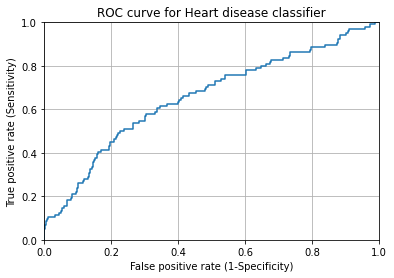

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [31]:
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.6558978441940226